In [1]:
/
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)


csv_file = os.path.join(path, "healthcare-dataset-stroke-data.csv")
df = pd.read_csv(csv_file)

# Display first 5 rows
print(df.head())


Path to dataset files: /kaggle/input/stroke-prediction-dataset
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
#!pip install scikit-learn==1.3.2 --no-cache-dir

#import sklearn
#print(sklearn.__version__)
#!pip install imbalanced-learn==0.10.1 --no-deps --no-cache-dir
#from imblearn.over_sampling import SMOTE

#print("SMOTE loaded successfully!")


## Basic Info and Shape

In [3]:
print(df.shape)
print(df.info())
print(df.describe())


(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   3651

## Missing Values

In [4]:
print(df.isnull().sum())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Target Variable Distribution

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


<Axes: title={'center': 'Stroke Class Distribution'}, xlabel='stroke'>

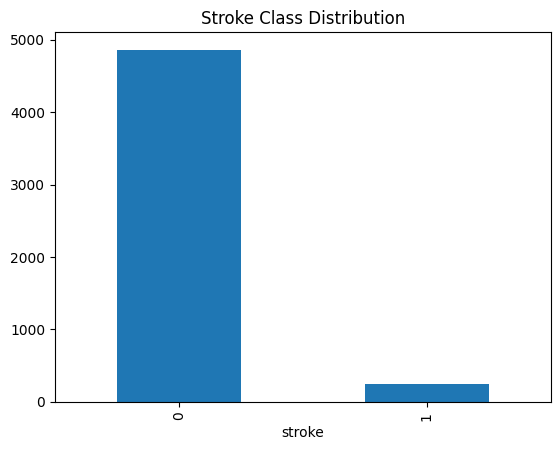

In [5]:
# Check if the target variable is imbalanced (spoiler: it is).

print(df['stroke'].value_counts(normalize=True))
df['stroke'].value_counts().plot(kind='bar', title='Stroke Class Distribution')


## Unique Values in Categorical Features

In [6]:
#Understand categories in features like gender, work_type, smoking_status

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Numerical Feature Distributions

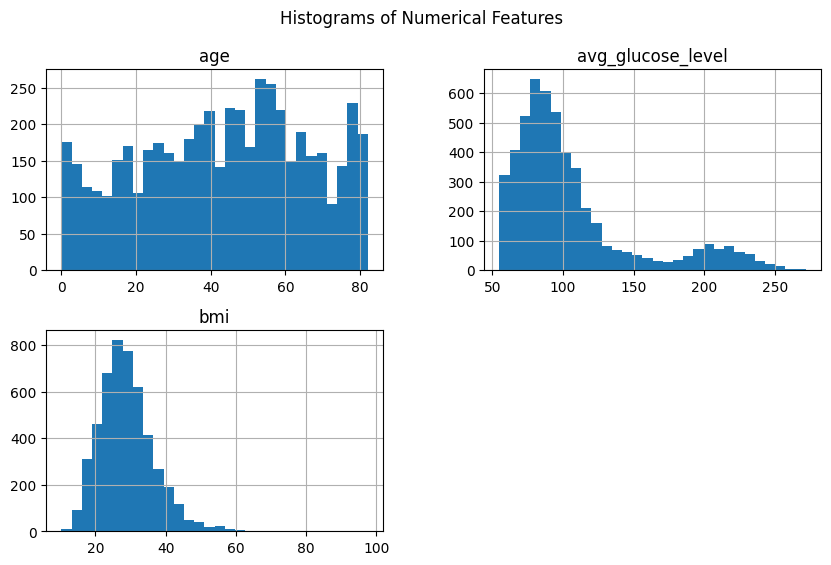

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df[numerical_cols].hist(bins=30, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()


 ## Box Plots / Violin Plots by Stroke Status

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

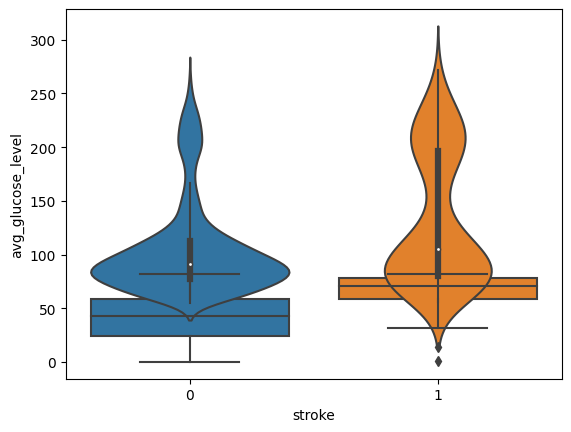

In [8]:
# See how features differ between stroke and non-stroke cases.

sns.boxplot(x='stroke', y='age', data=df)
sns.violinplot(x='stroke', y='avg_glucose_level', data=df)


## Correlation Analysis

<Axes: >

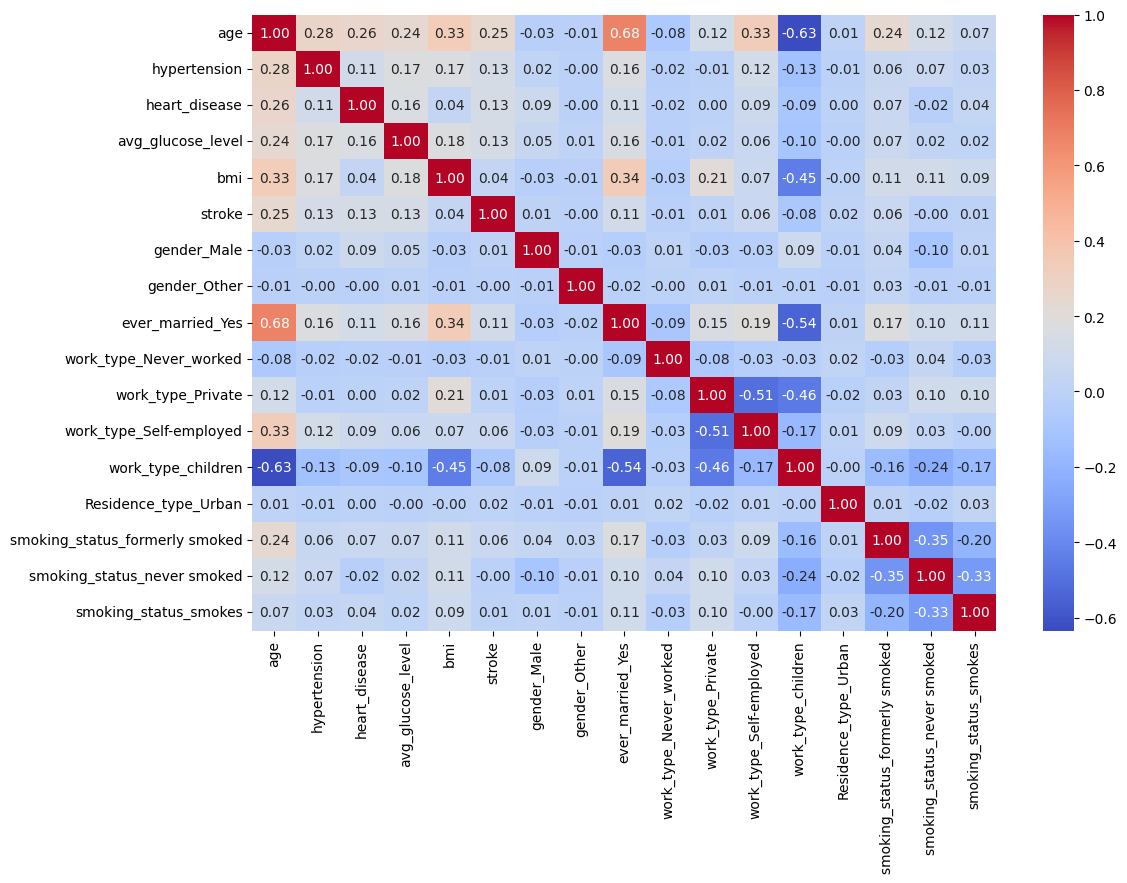

In [9]:
## Identify features that correlate with stroke
df_encoded = pd.get_dummies(df.drop(columns=['id']), drop_first=True)
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')

## Feature Engineering

In [10]:
# Check missing values again

print(df['bmi'].isnull().sum())  # Prints the number of nulls before imputation

# Fill missing 'bmi' values with median
median_bmi = df['bmi'].median()  # Calculates the median bmi
df['bmi'].fillna(median_bmi, inplace=True)  # Replaces nulls with median value

# Verify missing values handled
print(df['bmi'].isnull().sum())  # Prints 0 if all nulls are replaced



201
0


/tmp/ipykernel_270/3956847092.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(median_bmi, inplace=True)  # Replaces nulls with median value


In [11]:

df = pd.get_dummies(df, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
print(df.head())

      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0    

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('stroke', axis=1)
y = df['stroke']

# 4. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train models

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 6. Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9403131115459883
Random Forest Accuracy: 0.9393346379647749


In [13]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

Random Forest Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



# Summary of the Results:
Your models predict class 0 for every instance.

# That's why:

precision, recall, and f1-score for class 1 are all 0.00

Accuracy looks high (94%) but it's misleading

#  What's the Real Problem?
This is a severely imbalanced dataset:

Class 0: 960 samples

Class 1: 62 samples (~6%)

Your models are just playing it safe by predicting only the majority class (0), which gets them 94% accuracy — but they’re completely failing to detect the minority class (1), which may be the important one (e.g., fraud, disease, etc.).

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
rf = RandomForestClassifier(class_weight='balanced')

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.9403131115459883
Random Forest Accuracy: 0.9393346379647749


In [15]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

Random Forest Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [16]:
import numpy as np
import pandas as pd

# Convert to DataFrame if needed
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

# Find minority class
minority_class = y_train_df.value_counts().idxmin()

# Separate minority and majority
X_minority = X_train_df[y_train_df == minority_class]
y_minority = y_train_df[y_train_df == minority_class]

X_majority = X_train_df[y_train_df != minority_class]
y_majority = y_train_df[y_train_df != minority_class]

# Number of samples to add
n_samples_to_add = len(y_majority) - len(y_minority)

# Randomly sample with replacement from minority
X_minority_oversampled = X_minority.sample(n=n_samples_to_add, replace=True, random_state=42)
y_minority_oversampled = y_minority.sample(n=n_samples_to_add, replace=True, random_state=42)

# Concatenate oversampled minority with majority
X_resampled = pd.concat([X_train_df, X_minority_oversampled], axis=0).to_numpy()
y_resampled = pd.concat([y_train_df, y_minority_oversampled], axis=0).to_numpy()

# Shuffle resampled dataset
indices = np.arange(len(y_resampled))
np.random.seed(42)
np.random.shuffle(indices)

X_resampled = X_resampled[indices]
y_resampled = y_resampled[indices]

# Now train model on resampled data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_resampled, y_resampled)

y_pred = lr.predict(X_test)

print("Logistic Regression Report (with manual oversampling):")
print(classification_report(y_test, y_pred))


Logistic Regression Report (with manual oversampling):
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       960
           1       0.14      0.76      0.23        62

    accuracy                           0.69      1022
   macro avg       0.56      0.72      0.52      1022
weighted avg       0.93      0.69      0.77      1022



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit Random Forest with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Train Random Forest with balanced weights and more estimators
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

y_pred_rf = rf.predict(X_test)
print("Random Forest with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_rf))

In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Convert to DataFrame/Series for easier handling
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

# Identify minority class
minority_class = y_train_df.value_counts().idxmin()

# Separate majority and minority
X_minority = X_train_df[y_train_df == minority_class]
y_minority = y_train_df[y_train_df == minority_class]
X_majority = X_train_df[y_train_df != minority_class]
y_majority = y_train_df[y_train_df != minority_class]

# Oversample minority class with replacement
n_samples_to_add = len(y_majority) - len(y_minority)
X_minority_oversampled = X_minority.sample(n=n_samples_to_add, replace=True, random_state=42)
y_minority_oversampled = y_minority.sample(n=n_samples_to_add, replace=True, random_state=42)

# Combine oversampled minority with original training data
X_resampled = pd.concat([X_train_df, X_minority_oversampled], axis=0).to_numpy()
y_resampled = pd.concat([y_train_df, y_minority_oversampled], axis=0).to_numpy()

# Shuffle the dataset
indices = np.arange(len(y_resampled))
np.random.seed(42)
np.random.shuffle(indices)
X_resampled = X_resampled[indices]
y_resampled = y_resampled[indices]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_resampled, y_resampled)

# Predict and report
y_pred_rf = rf.predict(X_test)
print("Random Forest Report (with manual random oversampling):")
print(classification_report(y_test, y_pred_rf))


Random Forest Report (with manual random oversampling):
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.18      0.27      0.22        62

    accuracy                           0.88      1022
   macro avg       0.57      0.60      0.58      1022
weighted avg       0.90      0.88      0.89      1022



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [19]:
from sklearn.metrics import precision_recall_curve

y_probs = rf.predict_proba(X_test)[:, 1]
prec, rec, thresh = precision_recall_curve(y_test, y_probs)

# Plot PR curve or choose a threshold that improves F1
# For example, apply threshold = 0.3
y_pred_thresh = (y_probs >= 0.3).astype(int)
print(classification_report(y_test, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.98      0.78      0.87       960
           1       0.18      0.76      0.29        62

    accuracy                           0.78      1022
   macro avg       0.58      0.77      0.58      1022
weighted avg       0.93      0.78      0.83      1022



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np

# Manual oversampling (reusing from your earlier code)
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

minority_class = y_train_df.value_counts().idxmin()
X_minority = X_train_df[y_train_df == minority_class]
y_minority = y_train_df[y_train_df == minority_class]
X_majority = X_train_df[y_train_df != minority_class]
y_majority = y_train_df[y_train_df != minority_class]

n_samples_to_add = len(y_majority) - len(y_minority)
X_minority_oversampled = X_minority.sample(n=n_samples_to_add, replace=True, random_state=42)
y_minority_oversampled = y_minority.sample(n=n_samples_to_add, replace=True, random_state=42)

X_resampled = pd.concat([X_train_df, X_minority_oversampled], axis=0).to_numpy()
y_resampled = pd.concat([y_train_df, y_minority_oversampled], axis=0).to_numpy()

# Shuffle
indices = np.arange(len(y_resampled))
np.random.seed(42)
np.random.shuffle(indices)
X_resampled = X_resampled[indices]
y_resampled = y_resampled[indices]

# XGBoost model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_resampled, y_resampled)

# Predict probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning (example: 0.3)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Report
print("XGBoost Classification Report (threshold = 0.3):")
print(classification_report(y_test, y_pred_thresh))


XGBoost Classification Report (threshold = 0.3):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.22      0.31      0.26        62

    accuracy                           0.89      1022
   macro avg       0.59      0.62      0.60      1022
weighted avg       0.91      0.89      0.90      1022



In [21]:
import lightgbm as lgb

# LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    class_weight=None,  # Already oversampled
    random_state=42
)

lgb_model.fit(X_resampled, y_resampled)

# Predict probabilities
y_probs_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning (example: 0.3)
threshold = 0.3
y_pred_thresh_lgb = (y_probs_lgb >= threshold).astype(int)

# Report
print("LightGBM Classification Report (threshold = 0.3):")
print(classification_report(y_test, y_pred_thresh_lgb))


[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [26]:
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np

# Calculate class imbalance ratio
scale_pos_weight = len(y_train_df[y_train_df == 0]) / len(y_train_df[y_train_df == 1])

# Train XGBoost with scale_pos_weight
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_model.fit(X_train, y_train)

#



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [23]:
from sklearn.metrics import f1_score

best_f1 = 0
best_thresh = 0.5
for t in np.arange(0.1, 0.9, 0.01):
    preds = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best F1: {best_f1:.3f} at threshold {best_thresh:.2f}")



Best F1: 0.260 at threshold 0.31


In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve
import numpy as np

# Calculate class imbalance ratio
scale_pos_weight = len(y_train_df[y_train_df == 0]) / len(y_train_df[y_train_df == 1])

# Train XGBoost with scale_pos_weight
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Threshold tuning (e.g. 0.3)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Report
print("XGBoost Report (with scale_pos_weight, threshold = 0.3):")
print(classification_report(y_test, y_pred_thresh))


XGBoost Report (with scale_pos_weight, threshold = 0.3):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       960
           1       0.19      0.29      0.23        62

    accuracy                           0.88      1022
   macro avg       0.57      0.61      0.58      1022
weighted avg       0.91      0.88      0.89      1022



In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Calculate scale_pos_weight from original y_train
scale_pos_weight = len(y_train_df[y_train_df == 0]) / len(y_train_df[y_train_df == 1])

# Base model
xgb_base = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Grid of parameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# F1 scorer for minority class (positive class = 1)
scorer = make_scorer(f1_score, pos_label=1)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, 
                           scoring=scorer, cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Predict on test set using best model
best_model = grid_search.best_estimator_
y_probs = best_model.predict_proba(X_test)[:, 1]

# Optional: Tune threshold
threshold = 0.3  # or auto-tune it
y_pred = (y_probs >= threshold).astype(int)

print("Tuned XGBoost Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.2377417681345174
Tuned XGBoost Report:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78       960
           1       0.14      0.85      0.24        62

    accuracy                           0.66      1022
   macro avg       0.56      0.75      0.51      1022
weighted avg       0.93      0.66      0.75      1022



In [29]:
from sklearn.metrics import f1_score

best_f1 = 0
best_thresh = 0.5
for t in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best F1 = {best_f1:.3f} at threshold = {best_thresh:.2f}")


Best F1 = 0.326 at threshold = 0.61


 ## What’s Good Here (Especially for Medical Use):
High Recall for Stroke Cases (0.85):
This means 85% of actual stroke cases are detected, which is often the most important goal in healthcare — better to detect a stroke than to miss it.

Acceptable Recall Trade-off for No-Stroke Cases (0.65):
You still catch most of the non-stroke cases too.

##  What Needs Attention:
Very Low Precision for Stroke Cases (0.14):
Only 14% of predicted strokes are actual strokes — which means 86% are false positives.

This could lead to:

Unnecessary panic

Costly tests or treatments

Overburdening healthcare systems if used at scale

